In [93]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

In [ ]:
def psycometrique(data_tuple,var2):
    result, mean_used = data_tuple
    true_array_mean_used = []
    true_array_result = []
    block_size = 1000           
    big_blocs = 21           # nb de valeurs de S2 par courbe
    size_one_block = block_size * big_blocs  

    for j in range(len(var2)):
        array_mean_result = []
        array_mean_used = []
        for i in range(0, size_one_block, block_size):
            # bloc de result
            block_r = result[size_one_block*j + i : size_one_block*j + i+block_size]
            mean_r = sum(block_r) / len(block_r)
            array_mean_result.append(mean_r)

            # bloc de mean_used
            block_m = mean_used[size_one_block*j + i : size_one_block*j + i+block_size]
            mean_m = sum(block_m) / len(block_m)
            array_mean_used.append(mean_m)

        true_array_result.append(array_mean_result)
        true_array_mean_used.append(array_mean_used)
    return true_array_result, true_array_mean_used


def data_var2(file_path):
    df = pd.read_csv(file_path)
    var2 = df['S2_std'].to_numpy()
    var2 = pd.unique(var2)      
    return list(var2)           


def ploter(mean_used_all, mean_res_all, var, var1=0.2):
    """
    Graphique unique : psychometric curves (x_star search)
    """

    seuil = 0.5
    x_stars = []

    fig, ax = plt.subplots(figsize=(8, 6))

    # ==========================================
    # ---------- Courbes psychométriques -------
    # ==========================================
    print("=== Points d'intersection avec P = 0.5 ===")

    for idx, (x_vals, y_vals) in enumerate(zip(mean_used_all, mean_res_all)):

        # tracer la courbe
        line, = ax.plot(x_vals, y_vals, 'o-', label=f'var = {var[idx]}')
        color = line.get_color()

        # --- recherche du passage par 0.5 ---
        x_cross = None
        for x1, y1, x2, y2 in zip(x_vals[:-1], y_vals[:-1],
                                  x_vals[1:],  y_vals[1:]):
            if (y1 - seuil) * (y2 - seuil) <= 0 and y1 != y2:
                x_cross = x1 + (seuil - y1) * (x2 - x1) / (y2 - y1)
                break

        if x_cross is not None:
            ax.scatter([x_cross], [seuil], color=color, zorder=5)
            ax.text(x_cross, seuil + 0.03, f'{x_cross:.2f}',
                     color=color, ha='center', va='bottom', fontsize=8)
            print(f'Bloc {idx+1} : x = {x_cross:.3f}')
        else:
            print(f'Bloc {idx+1} : pas de croisement avec 0.5')

        x_stars.append(x_cross)

    ax.axhline(seuil, color='red', linestyle='--', linewidth=1.5,
                label='Chance level (0.5)')

    ax.set_xlabel('Mean S1 value')
    ax.set_ylabel('Mean decision (P[1])')
    ax.set_title('Psychometric Functions')
    ax.grid(True, alpha=0.3)
    ax.legend()

    plt.tight_layout()
    plt.show()

    slopes = slope_x(x_stars, var, var1)
    return x_stars, slopes


def reading_csv(file_path, inverser = False):
    df = pd.read_csv(file_path)
    if inverser : 
        mean_used = df['S1_val'].tolist()
    else:
        mean_used = df['S2_val'].tolist()
    result = df['Decision (S1>S2)'].tolist()
    data_tuple = (result, mean_used)  
    print(len(result))
    return data_tuple


def slope_x(x_star, var2, var1=0.2):
    slopes = []
    for x, v in zip(x_star, var2):
        if x is None:
            slopes.append(np.nan)   # ou ne rien ajouter, selon ce que tu veux
            # var_valid ne prend pas ce v si tu veux vraiment ignorer ce point
        else : 
            slopes.append(x / (v**2 + var1**2))

    return slopes


def main(file_path, inverser):
    print('test')
    
    data_tuple = reading_csv(file_path, inverser=inverser)
    var2 = data_var2(file_path)
    array_mean_result, array_mean_used = psycometrique(data_tuple, var2)
    x_stars, slopes = ploter(array_mean_used, array_mean_result, var2)
    print("x_stars :", x_stars)
    return slopes, x_stars


Processing file: test\experiment_results_test.csv
test
400000
=== Points d'intersection avec P = 0.5 ===
Bloc 1 : pas de croisement avec 0.5


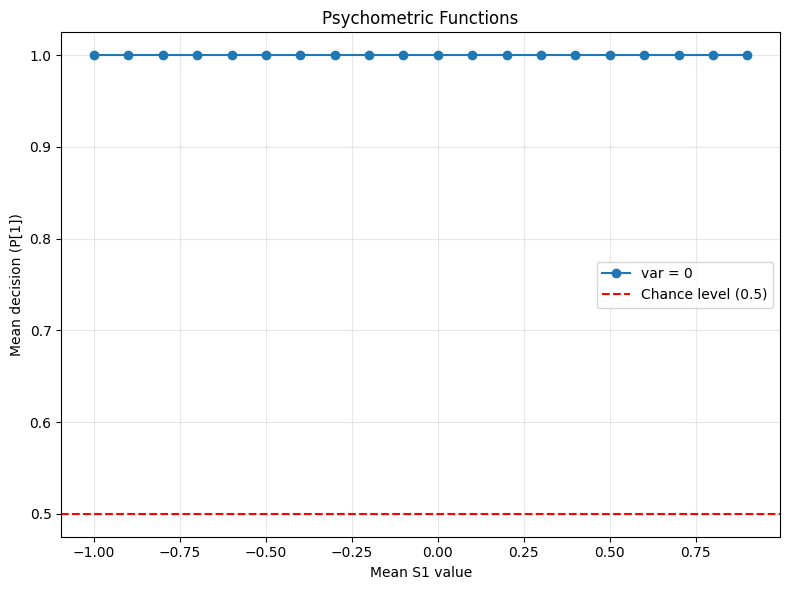

x_stars : [None]
[None]


In [95]:
files = ["test\\experiment_results_test.csv"]

x_stars = []
vals = []
inverser = True
print("\nProcessing file:", files[0])
slope, x_star = main(file_path=files[0] , inverser=inverser)
print(x_star)

    

try to find p[x1>x2]= 0.84

In [96]:
def psycometrique(data_tuple,var2):
    result, mean_used = data_tuple
    true_array_mean_used = []
    true_array_result = []
    block_size = 1000           
    big_blocs = 21           # nb de valeurs de S2 par courbe
    size_one_block = block_size * big_blocs  

    for j in range(len(var2)):
        array_mean_result = []
        array_mean_used = []
        for i in range(0, size_one_block, block_size):
            # bloc de result
            block_r = result[size_one_block*j + i : size_one_block*j + i+block_size]
            mean_r = sum(block_r) / len(block_r)
            array_mean_result.append(mean_r)

            # bloc de mean_used
            block_m = mean_used[size_one_block*j + i : size_one_block*j + i+block_size]
            mean_m = sum(block_m) / len(block_m)
            array_mean_used.append(mean_m)

        true_array_result.append(array_mean_result)
        true_array_mean_used.append(array_mean_used)
    return true_array_result, true_array_mean_used


def data_var2(file_path):
    df = pd.read_csv(file_path)
    var2 = df['S2_std'].to_numpy()
    var2 = pd.unique(var2)      
    return list(var2)           


def ploter(mean_used_all, mean_res_all, var, var1=0.2):
    """
    Graphique unique : psychometric curves (x_star search)
    """

    seuil = 0.84
    x_stars = []

    fig, ax = plt.subplots(figsize=(8, 6))

    # ==========================================
    # ---------- Courbes psychométriques -------
    # ==========================================
    print("=== Points d'intersection avec P = 0.5 ===")

    for idx, (x_vals, y_vals) in enumerate(zip(mean_used_all, mean_res_all)):

        # tracer la courbe
        line, = ax.plot(x_vals, y_vals, 'o-', label=f'var = {var[idx]}')
        color = line.get_color()

        # --- recherche du passage par 0.5 ---
        x_cross = None
        for x1, y1, x2, y2 in zip(x_vals[:-1], y_vals[:-1],
                                  x_vals[1:],  y_vals[1:]):
            if (y1 - seuil) * (y2 - seuil) <= 0 and y1 != y2:
                x_cross = x1 + (seuil - y1) * (x2 - x1) / (y2 - y1)
                break

        if x_cross is not None:
            ax.scatter([x_cross], [seuil], color=color, zorder=5)
            ax.text(x_cross, seuil + 0.03, f'{x_cross:.2f}',
                     color=color, ha='center', va='bottom', fontsize=8)
            print(f'Bloc {idx+1} : x = {x_cross:.3f}')
        else:
            print(f'Bloc {idx+1} : pas de croisement avec 0.5')

        x_stars.append(x_cross)

    ax.axhline(seuil, color='red', linestyle='--', linewidth=1.5,
                label='Chance level (0.5)')

    ax.set_xlabel('Mean S1 value')
    ax.set_ylabel('Mean decision (P[1])')
    ax.set_title('Psychometric Functions')
    ax.grid(True, alpha=0.3)
    ax.legend()

    plt.tight_layout()
    plt.show()

    slopes = slope_x(x_stars, var, var1)
    return x_stars, slopes


def reading_csv(file_path, inverser = False):
    df = pd.read_csv(file_path)
    if inverser : 
        mean_used = df['S1_val'].tolist()
    else:
        mean_used = df['S2_val'].tolist()
    result = df['Decision (S1>S2)'].tolist()
    data_tuple = (result, mean_used)  
    print(len(result))
    return data_tuple


def slope_x(x_star, var2, var1=0.2):
    slopes = []
    for x, v in zip(x_star, var2):
        if x is None:
            slopes.append(np.nan)   # ou ne rien ajouter, selon ce que tu veux
            # var_valid ne prend pas ce v si tu veux vraiment ignorer ce point
        else : 
            slopes.append(x / (v**2 + var1**2))

    return slopes


def main(file_path, inverser):
    print('test')
    
    data_tuple = reading_csv(file_path, inverser=inverser)
    var2 = data_var2(file_path)
    array_mean_result, array_mean_used = psycometrique(data_tuple, var2)
    x_stars, slopes = ploter(array_mean_used, array_mean_result, var2)
    print("x_stars :", x_stars)
    return slopes, x_stars


Processing file: test\experiment_results_test.csv
test
400000
=== Points d'intersection avec P = 0.5 ===
Bloc 1 : pas de croisement avec 0.5


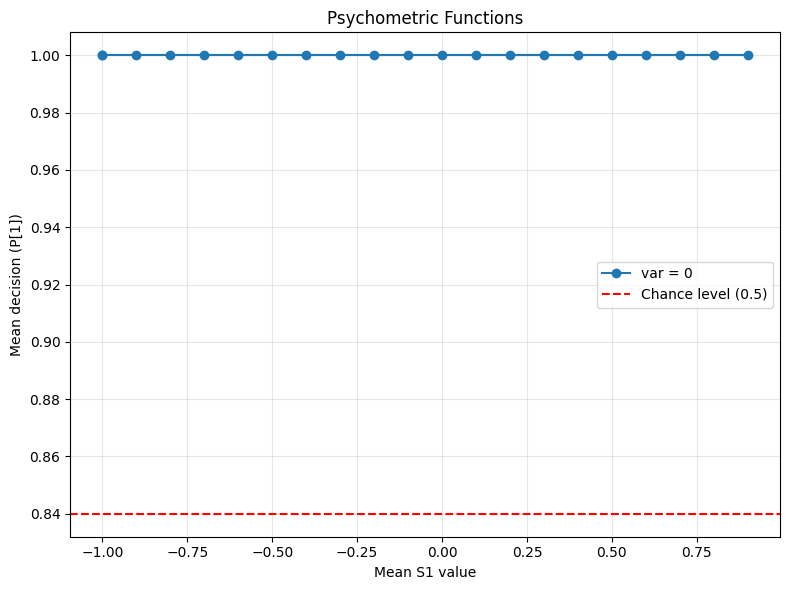

x_stars : [None]
[None]


In [97]:
files = ["test\\experiment_results_test.csv"]

x_stars = []
vals = []
inverser = True
print("\nProcessing file:", files[0])
slope, x_star2 = main(file_path=files[0] , inverser=inverser)
print(x_star2)

    

In [98]:
print(np.abs(x_star[0]-x_star2[0]))


TypeError: unsupported operand type(s) for -: 'NoneType' and 'NoneType'

In [103]:
def psycometrique(data_tuple,var2):
    result, mean_used = data_tuple
    true_array_mean_used = []
    true_array_result = []
    block_size = 1000           
    big_blocs = 20        # nb de valeurs de S2 par courbe
    size_one_block = block_size * big_blocs  

    for j in range(len(var2)):
        array_mean_result = []
        array_mean_used = []
        for i in range(0, size_one_block, block_size):
            # bloc de result
            block_r = result[size_one_block*j + i : size_one_block*j + i+block_size]
            mean_r = sum(block_r) / len(block_r)
            array_mean_result.append(mean_r)

            # bloc de mean_used
            block_m = mean_used[size_one_block*j + i : size_one_block*j + i+block_size]
            mean_m = sum(block_m) / len(block_m)
            array_mean_used.append(mean_m)

        true_array_result.append(array_mean_result)
        true_array_mean_used.append(array_mean_used)
    return true_array_result, true_array_mean_used


def data_var2(file_path):
    df = pd.read_csv(file_path)
    var2 = df['S2_val'].to_numpy()
    var2 = pd.unique(var2)      
    return list(var2)           


def ploter(mean_used_all, mean_res_all, var, var1=0.2):
    """
    Graphique unique : psychometric curves (x_star search)
    """

    seuil = 0.5
    x_stars = []

    fig, ax = plt.subplots(figsize=(8, 6))

    # ==========================================
    # ---------- Courbes psychométriques -------
    # ==========================================
    print("=== Points d'intersection avec P = 0.5 ===")

    for idx, (x_vals, y_vals) in enumerate(zip(mean_used_all, mean_res_all)):

        # tracer la courbe
        line, = ax.plot(x_vals, y_vals, 'o-', label=f'var = {var[idx]}')
        color = line.get_color()

        # --- recherche du passage par 0.5 ---
        x_cross = None
        for x1, y1, x2, y2 in zip(x_vals[:-1], y_vals[:-1],
                                  x_vals[1:],  y_vals[1:]):
            if (y1 - seuil) * (y2 - seuil) <= 0 and y1 != y2:
                x_cross = x1 + (seuil - y1) * (x2 - x1) / (y2 - y1)
                break

        if x_cross is not None:
            ax.scatter([x_cross], [seuil], color=color, zorder=5)
            ax.text(x_cross, seuil + 0.03, f'{x_cross:.2f}',
                     color=color, ha='center', va='bottom', fontsize=8)
            print(f'Bloc {idx+1} : x = {x_cross:.3f}')
        else:
            print(f'Bloc {idx+1} : pas de croisement avec 0.5')

        x_stars.append(x_cross)

    ax.axhline(seuil, color='red', linestyle='--', linewidth=1.5,
                label='Chance level (0.5)')

    ax.set_xlabel('Mean S1 value')
    ax.set_ylabel('Mean decision (P[1])')
    ax.set_title('Psychometric Functions')
    ax.grid(True, alpha=0.3)
    ax.legend()

    plt.tight_layout()
    plt.show()

    slopes = slope_x(x_stars, var, var1)
    return x_stars, slopes


def reading_csv(file_path, inverser = False):
    df = pd.read_csv(file_path)
    if inverser : 
        mean_used = df['S1_val'].tolist()
    else:
        mean_used = df['S2_val'].tolist()
    result = df['Decision (S1>S2)'].tolist()
    data_tuple = (result, mean_used)  
    print(len(result))
    return data_tuple


def slope_x(x_star, var2, var1=0.2):
    slopes = []
    for x, v in zip(x_star, var2):
        if x is None:
            slopes.append(np.nan)   # ou ne rien ajouter, selon ce que tu veux
            # var_valid ne prend pas ce v si tu veux vraiment ignorer ce point
        else : 
            slopes.append(x / (v**2 + var1**2))

    return slopes


def main(file_path, inverser):
    print('test')
    
    data_tuple = reading_csv(file_path, inverser=inverser)
    var2 = data_var2(file_path)
    array_mean_result, array_mean_used = psycometrique(data_tuple, var2)
    x_stars, slopes = ploter(array_mean_used, array_mean_result, var2)
    print("x_stars :", x_stars)
    return slopes, x_stars


Processing file: test\experiment_results_test.csv
test
400000
=== Points d'intersection avec P = 0.5 ===
Bloc 1 : pas de croisement avec 0.5
Bloc 2 : pas de croisement avec 0.5
Bloc 3 : pas de croisement avec 0.5
Bloc 4 : pas de croisement avec 0.5
Bloc 5 : pas de croisement avec 0.5
Bloc 6 : pas de croisement avec 0.5
Bloc 7 : pas de croisement avec 0.5
Bloc 8 : pas de croisement avec 0.5
Bloc 9 : pas de croisement avec 0.5
Bloc 10 : x = -0.974
Bloc 11 : x = -0.033
Bloc 12 : pas de croisement avec 0.5
Bloc 13 : pas de croisement avec 0.5
Bloc 14 : pas de croisement avec 0.5
Bloc 15 : pas de croisement avec 0.5
Bloc 16 : pas de croisement avec 0.5
Bloc 17 : pas de croisement avec 0.5
Bloc 18 : pas de croisement avec 0.5
Bloc 19 : pas de croisement avec 0.5
Bloc 20 : pas de croisement avec 0.5


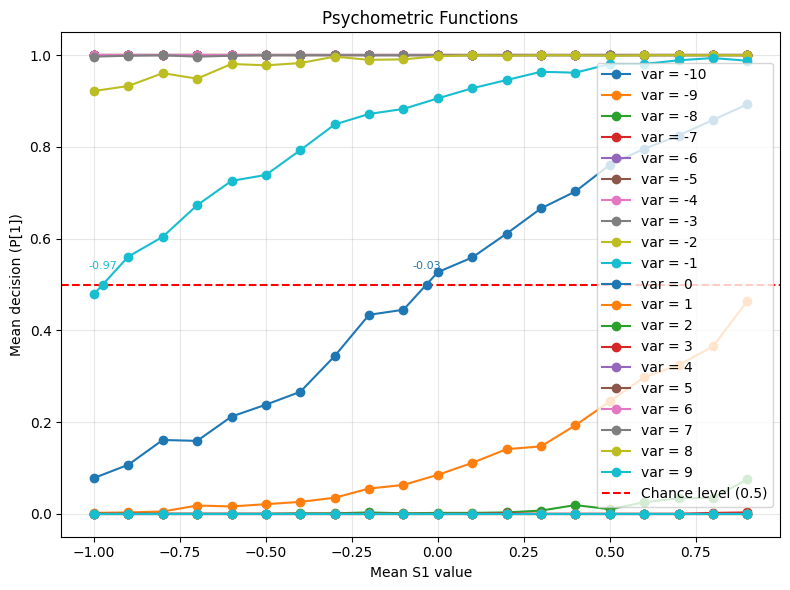

x_stars : [None, None, None, None, None, None, None, None, None, -0.9743902439024351, -0.03292682926829239, None, None, None, None, None, None, None, None, None]
[None, None, None, None, None, None, None, None, None, -0.9743902439024351, -0.03292682926829239, None, None, None, None, None, None, None, None, None]


In [104]:
files = ["test\\experiment_results_test.csv"]

x_stars = []
vals = []
inverser = True
print("\nProcessing file:", files[0])
slope, x_star = main(file_path=files[0] , inverser=inverser)
print(x_star)

    

In [105]:
def psycometrique(data_tuple,var2):
    result, mean_used = data_tuple
    true_array_mean_used = []
    true_array_result = []
    block_size = 1000           
    big_blocs = 20        # nb de valeurs de S2 par courbe
    size_one_block = block_size * big_blocs  

    for j in range(len(var2)):
        array_mean_result = []
        array_mean_used = []
        for i in range(0, size_one_block, block_size):
            # bloc de result
            block_r = result[size_one_block*j + i : size_one_block*j + i+block_size]
            mean_r = sum(block_r) / len(block_r)
            array_mean_result.append(mean_r)

            # bloc de mean_used
            block_m = mean_used[size_one_block*j + i : size_one_block*j + i+block_size]
            mean_m = sum(block_m) / len(block_m)
            array_mean_used.append(mean_m)

        true_array_result.append(array_mean_result)
        true_array_mean_used.append(array_mean_used)
    return true_array_result, true_array_mean_used


def data_var2(file_path):
    df = pd.read_csv(file_path)
    var2 = df['S2_val'].to_numpy()
    var2 = pd.unique(var2)      
    return list(var2)           


def ploter(mean_used_all, mean_res_all, var, var1=0.2):
    """
    Graphique unique : psychometric curves (x_star search)
    """

    seuil = 0.84
    x_stars = []

    fig, ax = plt.subplots(figsize=(8, 6))

    # ==========================================
    # ---------- Courbes psychométriques -------
    # ==========================================
    print("=== Points d'intersection avec P = 0.5 ===")

    for idx, (x_vals, y_vals) in enumerate(zip(mean_used_all, mean_res_all)):

        # tracer la courbe
        line, = ax.plot(x_vals, y_vals, 'o-', label=f'var = {var[idx]}')
        color = line.get_color()

        # --- recherche du passage par 0.5 ---
        x_cross = None
        for x1, y1, x2, y2 in zip(x_vals[:-1], y_vals[:-1],
                                  x_vals[1:],  y_vals[1:]):
            if (y1 - seuil) * (y2 - seuil) <= 0 and y1 != y2:
                x_cross = x1 + (seuil - y1) * (x2 - x1) / (y2 - y1)
                break

        if x_cross is not None:
            ax.scatter([x_cross], [seuil], color=color, zorder=5)
            ax.text(x_cross, seuil + 0.03, f'{x_cross:.2f}',
                     color=color, ha='center', va='bottom', fontsize=8)
            print(f'Bloc {idx+1} : x = {x_cross:.3f}')
        else:
            print(f'Bloc {idx+1} : pas de croisement avec 0.5')

        x_stars.append(x_cross)

    ax.axhline(seuil, color='red', linestyle='--', linewidth=1.5,
                label='Chance level (0.5)')

    ax.set_xlabel('Mean S1 value')
    ax.set_ylabel('Mean decision (P[1])')
    ax.set_title('Psychometric Functions')
    ax.grid(True, alpha=0.3)
    ax.legend()

    plt.tight_layout()
    plt.show()

    slopes = slope_x(x_stars, var, var1)
    return x_stars, slopes


def reading_csv(file_path, inverser = False):
    df = pd.read_csv(file_path)
    if inverser : 
        mean_used = df['S1_val'].tolist()
    else:
        mean_used = df['S2_val'].tolist()
    result = df['Decision (S1>S2)'].tolist()
    data_tuple = (result, mean_used)  
    print(len(result))
    return data_tuple


def slope_x(x_star, var2, var1=0.2):
    slopes = []
    for x, v in zip(x_star, var2):
        if x is None:
            slopes.append(np.nan)   # ou ne rien ajouter, selon ce que tu veux
            # var_valid ne prend pas ce v si tu veux vraiment ignorer ce point
        else : 
            slopes.append(x / (v**2 + var1**2))

    return slopes


def main(file_path, inverser):
    print('test')
    
    data_tuple = reading_csv(file_path, inverser=inverser)
    var2 = data_var2(file_path)
    array_mean_result, array_mean_used = psycometrique(data_tuple, var2)
    x_stars, slopes = ploter(array_mean_used, array_mean_result, var2)
    print("x_stars :", x_stars)
    return slopes, x_stars


Processing file: test\experiment_results_test.csv
test
400000
=== Points d'intersection avec P = 0.5 ===
Bloc 1 : pas de croisement avec 0.5
Bloc 2 : pas de croisement avec 0.5
Bloc 3 : pas de croisement avec 0.5
Bloc 4 : pas de croisement avec 0.5
Bloc 5 : pas de croisement avec 0.5
Bloc 6 : pas de croisement avec 0.5
Bloc 7 : pas de croisement avec 0.5
Bloc 8 : pas de croisement avec 0.5
Bloc 9 : pas de croisement avec 0.5
Bloc 10 : x = -0.316
Bloc 11 : x = 0.744
Bloc 12 : pas de croisement avec 0.5
Bloc 13 : pas de croisement avec 0.5
Bloc 14 : pas de croisement avec 0.5
Bloc 15 : pas de croisement avec 0.5
Bloc 16 : pas de croisement avec 0.5
Bloc 17 : pas de croisement avec 0.5
Bloc 18 : pas de croisement avec 0.5
Bloc 19 : pas de croisement avec 0.5
Bloc 20 : pas de croisement avec 0.5


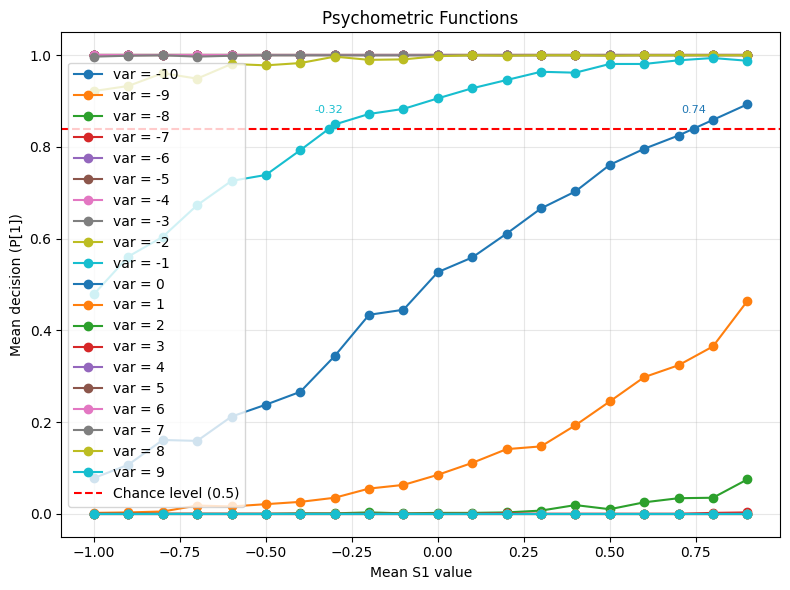

x_stars : [None, None, None, None, None, None, None, None, None, -0.31607142857143244, 0.7441176470588221, None, None, None, None, None, None, None, None, None]
[None, None, None, None, None, None, None, None, None, -0.9743902439024351, -0.03292682926829239, None, None, None, None, None, None, None, None, None]


In [106]:
files = ["test\\experiment_results_test.csv"]

x_stars = []
vals = []
inverser = True
print("\nProcessing file:", files[0])
slope, x_star2 = main(file_path=files[0] , inverser=inverser)
print(x_star)

    

In [112]:
print(x_star[9])

-0.9743902439024351


In [113]:
print(np.abs(x_star[9]-x_star2[9]))


0.6583188153310027
